<a href="https://colab.research.google.com/github/sarathchandranm2001/DataAnalysis/blob/main/5_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np#for numerical computation
import pandas as pd#for handling data set
import matplotlib.pyplot as plt #plotting graph
from sklearn.model_selection import train_test_split #for splitting data into
from sklearn.linear_model import LinearRegression #for creatinng lenair
from sklearn import datasets
from sklearn.metrics import mean_squared_error,r2_score #evaluating the model
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
#Load the dataset
#Load the dataset
file_path='/content/drive/MyDrive/insurance.csv' # Changed path to include MyDrive

In [16]:
data=pd.read_csv(file_path)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [19]:
print(data.isnull().sum())
data.info()#check for null values

#handle missing values(if any)
data['bmi'].fillna(data['bmi'].mean(),inplace=True)#inplace=true for saving
data=pd.get_dummies(data,columns=['sex','smoker','region'],drop_first=True)#yes or no
#Scale numerical features(if necessary)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data[['age','bmi','children']]=scaler.fit_transform(data[['age','bmi','children']])

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<function matplotlib.pyplot.show(close=None, block=None)>

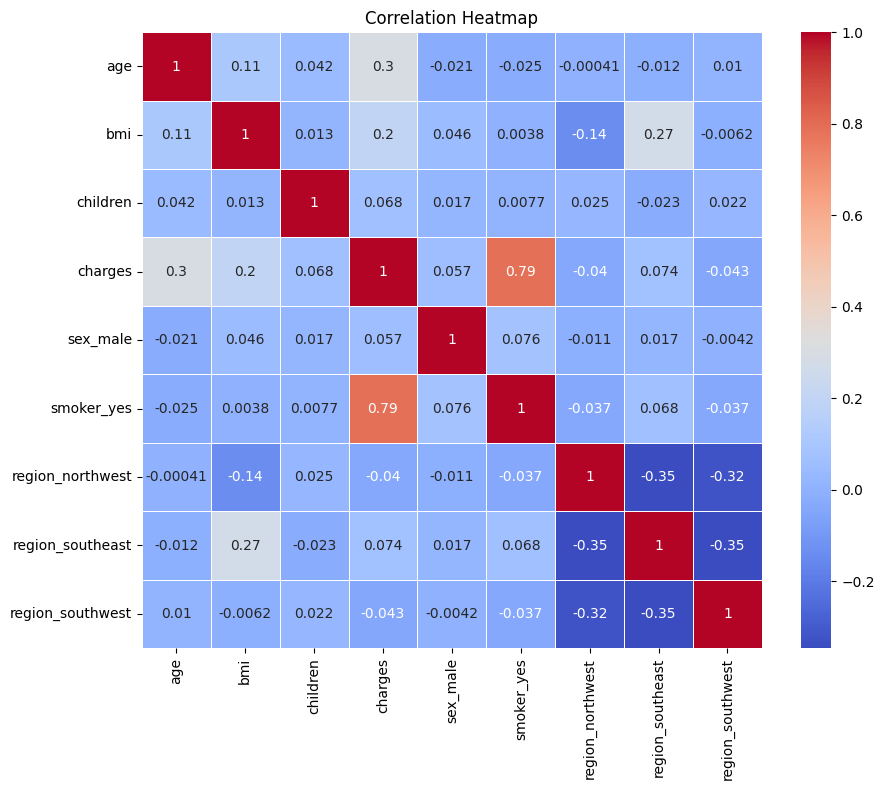

In [20]:
#visualise the correlation among variables using heatmap

import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix=data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show

In [21]:
from re import X
#create Ml Model using Leniar Regression
#Seperate Features (X) and target variable (y)
X=data.drop('charges',axis=1)
y=data['charges']
#split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#create a leniar regression model
model=LinearRegression()
#train the model on the training data
model.fit(X_train,y_train)
#make predictions on the testing data
y_pred=model.predict(X_test)
#print the coefficients and intercept
print('Coefficients:',model.coef_)
print('Intercept:',model.intercept_)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('Mean Squared Error:',mse)
print('R-squared:',r2)

Coefficients: [ 3.60914902e+03  2.05488506e+03  5.12478869e+02 -1.85916916e+01
  2.36511289e+04 -3.70677326e+02 -6.57864297e+02 -8.09799354e+02]
Intercept: 8946.081982340915
Mean Squared Error: 33596915.851361476
R-squared: 0.7835929767120722
